In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_csv("employee_churn_dataset.csv")


In [4]:
# Basic info
print("📌 Shape of dataset:", df.shape)
print("\n📌 Column names:", df.columns.tolist())

📌 Shape of dataset: (10000, 22)

📌 Column names: ['Employee ID', 'Age', 'Gender', 'Education Level', 'Marital Status', 'Tenure', 'Job Role', 'Department', 'Salary', 'Work Location', 'Performance Rating', 'Projects Completed', 'Training Hours', 'Promotions', 'Overtime Hours', 'Satisfaction Level', 'Work-Life Balance', 'Average Monthly Hours Worked', 'Absenteeism', 'Distance from Home', 'Manager Feedback Score', 'Churn']


In [5]:
# Show first 5 rows
print("\n🔍 Sample data:\n", df.head())


🔍 Sample data:
   Employee ID  Age Gender Education Level Marital Status  Tenure Job Role  \
0      E00001   50   Male      Bachelor's        Married       5  Analyst   
1      E00002   36   Male      Bachelor's        Married       4  Manager   
2      E00003   29   Male      Bachelor's        Married       3    Sales   
3      E00004   42   Male      Bachelor's         Single      12  Analyst   
4      E00005   40  Other      Bachelor's        Married       1    Sales   

  Department  Salary Work Location  ...  Training Hours  Promotions  \
0  Marketing   93422        Remote  ...              35           0   
1      Sales   44589       On-site  ...               1           0   
2         IT   56768        Hybrid  ...              41           0   
3      Sales   79009       On-site  ...              33           0   
4         HR   81982       On-site  ...              30           0   

   Overtime Hours  Satisfaction Level  Work-Life Balance  \
0              16                

In [6]:
# Data types and nulls
print("\n📊 Data Info:\n")
print(df.info())

print("\n🧹 Missing Values:\n")
print(df.isnull().sum())


📊 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Marital Status                10000 non-null  object 
 5   Tenure                        10000 non-null  int64  
 6   Job Role                      10000 non-null  object 
 7   Department                    10000 non-null  object 
 8   Salary                        10000 non-null  int64  
 9   Work Location                 10000 non-null  object 
 10  Performance Rating            10000 non-null  int64  
 11  Projects Completed            10000 non-null  int64  
 12  Training Hours                10000 non-null  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [8]:
# Copy the original dataframe
data = df.copy()

#  Step 1: Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col != 'Churn':  # Don't encode target yet
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [9]:
#  Step 2: Encode target
target_encoder = LabelEncoder()
data['Churn'] = target_encoder.fit_transform(data['Churn'])

In [10]:
#  Step 3: Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

In [11]:
#  Step 4: Scale features (optional but good for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Step 5: Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Preprocessing Complete")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

✅ Preprocessing Complete
X_train shape: (8000, 21)
X_test shape: (2000, 21)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
# Step 1: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Step 2: Predict on test set
y_pred = model.predict(X_test)

In [16]:
# Step 3: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}\n")

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.80

📊 Confusion Matrix:
[[1604    0]
 [ 396    0]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


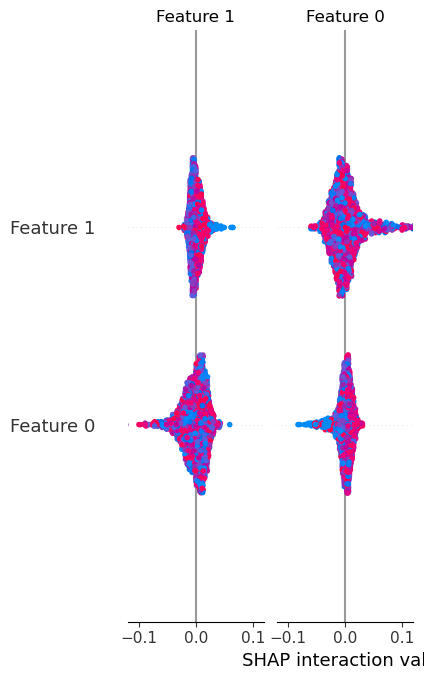

In [17]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Check if shap_values is a list (multi-class classifier) or array (binary/regressor)
if isinstance(shap_values, list):
    # For classifiers like RandomForestClassifier
    shap.summary_plot(shap_values[1], X_test)
else:
    # For regressors or binary classifier with array output
    shap.summary_plot(shap_values, X_test)


In [18]:
def recommend_action(input_row, shap_values_row, top_n=3):
    feature_names = list(input_row.index)
    top_features_idx = np.argsort(np.abs(shap_values_row))[-top_n:][::-1]
    top_features = [feature_names[i] for i in top_features_idx]

    recommendations = []

    for feature in top_features:
        if feature == "OverTime" and input_row[feature] == "Yes":
            recommendations.append("Reduce overtime hours to prevent burnout.")
        elif feature == "WorkLifeBalance" and input_row[feature] in ["Bad", 1]:
            recommendations.append("Assign employee to wellness program.")
        elif feature == "YearsInCurrentRole" and input_row[feature] > 4:
            recommendations.append("Offer new role or internal rotation.")
        elif feature == "TrainingTimesLastYear" and input_row[feature] < 2:
            recommendations.append("Enroll in mentorship or upskilling programs.")
        # Add more rules as needed

    return recommendations


In [19]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="qwen/qwen3-8b",                     # Or whatever model name LM Studio is using
    openai_api_base="http://localhost:1234/v1",  # Local LM Studio server
    openai_api_key="lm-studio",                  # Dummy value, required by LangChain
    temperature=0.5
)


In [20]:
import numpy as np
def generate_llm_recommendation(input_row, shap_row, top_n=3):
    feature_names = input_row.index.tolist()
    top_indices = np.argsort(np.abs(shap_row)).flatten()[-top_n:][::-1]  # ensure it's flat

    reasons = ", ".join(
        f"{feature_names[i]}: {input_row.iloc[i]}" for i in top_indices
    )

    prompt = f"""
    You are an HR assistant.
    An employee is predicted to leave the company.
    The top contributing factors are: {reasons}.
    Suggest 2–3 actionable HR interventions to help retain this employee.
    """

    response = llm.invoke(prompt).content
    return response



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import datetime

def notify_hr_email(emp_id, dept, role, recs, to="roxhiit4@gmail.com"):
    sender_email = "rohitbhagasra4@gmail.com"
    sender_password = "uinikxehmairbpei"

    subject = f"🚨 Attrition Risk Alert: Employee {emp_id} - {role}"

    body = f"""
Hi HR Team,

 The following employee has been flagged as a high attrition risk on {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}:

    Employee ID: {emp_id}  
    Department: {dept}  
    Job Role: {role}

Recommended HR Actions:
{recs}

Please review their situation and take appropriate actions to retain this valuable employee.

—
Attrition Prediction Agent
"""

    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = to
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    try:
        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
            smtp.login(sender_email, sender_password)
            smtp.send_message(msg)
        print(f" Email sent to {to} for Employee {emp_id}")
    except smtplib.SMTPAuthenticationError:
        print(" Authentication failed. Check sender email or app password.")
    except smtplib.SMTPRecipientsRefused:
        print(" Recipient address rejected.")
    except Exception as e:
        print(" Failed to send email:", e)


In [ ]:
for i in range(len(X_test)):
    input_row = X_test.iloc[i]
    prediction = model.predict([input_row])[0]

    if prediction == 1:
        shap_row = shap_values[i]
        recs = generate_llm_recommendation(input_row, shap_row)

        # ✅ Get metadata
        emp_id = df.iloc[X_test.index[i]]['Employee ID']
        dept = df.iloc[X_test.index[i]]['Department']
        role = df.iloc[X_test.index[i]]['Job Role']

        notify_hr_email(emp_id=emp_id, dept=dept, role=role, recs=recs)


 Email sent to roxhiit4@gmail.com for Employee E07354
